In [2]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt

In [3]:

# 1. Загрузите выборку Wine по адресу https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

# 2. Извлеките из данных признаки и классы. 
# Класс записан в первом столбце (три варианта), признаки — в столбцах со второго по последний. 
# Более подробно о сути признаков можно прочитать по адресу https://archive.ics.uci.edu/ml/datasets/Wine 
# (см. также файл wine.names, приложенный к заданию)

names = [
    'class', 
    'Alcohol', 
    'Malic acid', 
    'Ash', 
    'Alcalinity of ash', 
    'Magnesium', 
    'Total phenols', 
    'Flavanoids', 
    'Nonflavanoid phenols', 
    'Proanthocyanins', 
    'Color intensity', 
    'Hue', 
    'OD280/OD315 of diluted wines', 
    'Proline '
    ]

data = pd.read_csv('wine.data', names = names)

wine_class = data['class']

wine_features = data[names[1:]]

In [4]:
# 3. Оценку качества необходимо провести методом кросс-валидации по 5 блокам (5-fold). 
# Создайте генератор разбиений, который перемешивает выборку перед формированием блоков (shuffle=True). 
# Для воспроизводимости результата, создавайте генератор KFold с фиксированным параметром random_state=42. 
# В качестве меры качества используйте долю верных ответов (accuracy).

    # 1. Создается генератор разбиений sklearn.model_selection.KFold, который задает набор разбиений на обучение и валидацию. 
    # Число блоков в кросс-валидации определяется параметром n_splits. 
    # Обратите внимание, что порядок следования объектов в выборке может быть неслучайным, это может привести к смещенности кросс-валидационной оценки. 
    # Чтобы устранить такой эффект, объекты выборки случайно перемешивают перед разбиением на блоки. 
    # Для перемешивания достаточно передать генератору KFold параметр shuffle=True.

from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # 2. Вычислить ошибку на всех разбиениях можно при помощи функции sklearn.model_selection.cross_val_score. 
    # В качестве параметра estimators передается классификатор, в качестве параметра cv — генератор разбиений с предыдущего шага. 
    # С помощью параметра scoring можно задавать меру качества, по умолчанию в задачах классификации используется доля верных ответов (accuracy). 
    # Результатом является массив, значения которого нужно усреднить.


# 4. Найдите точность классификации на кросс-валидации для метода k ближайших соседей (sklearn.neighbors.KNeighborsClassifier), при k от 1 до 50. 
# При каком k получилось оптимальное качество? 
# Чему оно равно (число в интервале от 0 до 1)? 
# Данные результаты и будут ответами на вопросы 1 и 2.

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

Acc = np.zeros(50)
for k in range(1, 51):
    neigh = KNeighborsClassifier(n_neighbors=k)
    acc = cross_val_score(neigh, wine_features, wine_class, cv = kf)
    Acc[k-1] = acc.mean()

max_acc = Acc[1:].max()
argmax_acc = np.where(Acc[1:] == max_acc)
print(max_acc, argmax_acc)


0.7246031746031747 (array([32, 33]),)


0.9776190476190475 (array([27]),)


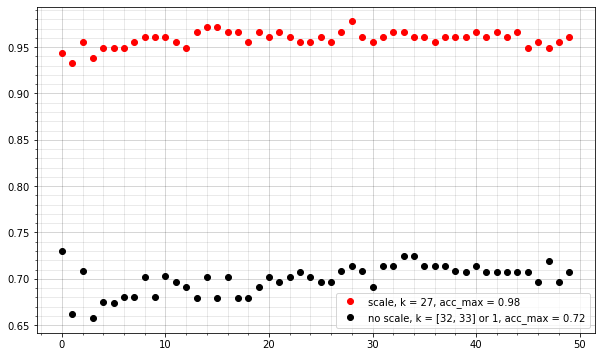

In [5]:
# 5. Произведите масштабирование признаков с помощью функции sklearn.preprocessing.scale. 
# Снова найдите оптимальное k на кросс-валидации.

# 6. Какое значение k получилось оптимальным после приведения признаков к одному масштабу? 
# Как изменилось значение качества? 
# Приведите ответы на вопросы 3 и 4.

Acc2 = np.zeros(50)
for k in range(1, 51):
    neigh = KNeighborsClassifier(n_neighbors=k)
    acc = cross_val_score(neigh, skl.preprocessing.scale(wine_features), wine_class, cv = kf)
    Acc2[k-1] = acc.mean()


max_acc2 = Acc2[1:].max()
argmax_acc2 = np.where(Acc2[1:] == max_acc2)
print(max_acc2, argmax_acc2)

fig = plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(Acc2, 'r', marker = 'o', linewidth = 0, label = 'scale, k = 27, acc_max = 0.98')
plt.plot(Acc, 'k', marker = 'o', linewidth = 0, label = 'no scale, k = [32, 33] or 1, acc_max = 0.72')
plt.minorticks_on() 
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.2) 
plt.grid(b=True, which='minor', color='k', linestyle='-', alpha=0.1)
plt.legend()